In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from PIL import Image
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
import os
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

Using TensorFlow backend.
C:\Users\Jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
yes_img=glob.glob('C:/Users/Jamie/Downloads/brain_mri/yes/*')

no_img=glob.glob('C:/Users/Jamie/Downloads/brain_mri/no/*')

In [4]:
x_no=[]
y_no=[]
for i in range(len(no_img)):
    no=0
    im=cv2.imread(no_img[i])
    im = cv2.resize(im, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im/255.
    x_no.append(im)
    y_no.append(no)

x_no=np.asarray(x_no)

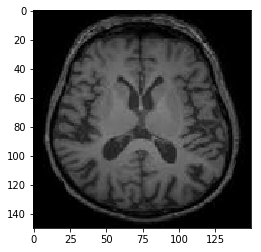

In [5]:
plt.imshow(x_no[1])

In [6]:
x_yes=[]
y_yes=[]
try:
    for k in range(len(yes_img)):
        yes=1
        im1=cv2.imread(yes_img[k])
        im1 = cv2.resize(im1, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        im1 = im1/255
        x_yes.append(im1)
        y_yes.append(yes)

except Exception as e:
    print(str(e))
    
x_yes=np.asarray(x_yes)

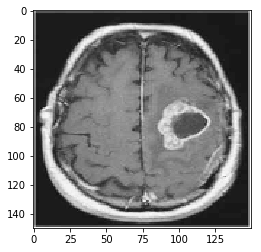

In [7]:
plt.imshow(x_yes[1])

In [8]:
x_data=np.concatenate((x_no,x_yes), axis=0)
y_data=np.concatenate((y_no,y_yes), axis=0)

In [9]:
x, y = shuffle(x_data, y_data,random_state=0)


253
253
1
(253, 150, 150, 3)
(253,)


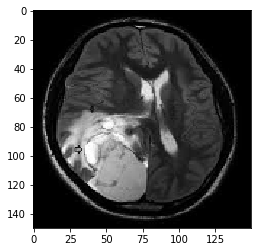

In [10]:
i=2
plt.imshow(x[i])
print(len(x))
print(len(y))
print(y[i])
print(x.shape)
print(y.shape)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=47)

In [12]:
len(x_train)

177

In [13]:
x_val = x_train[:80]
partial_x_train = x_train[80:]
y_val = y_train[:80]
partial_y_train = y_train[80:]

In [14]:
print(len(partial_x_train))
print(len(x_val))
print(len(x_test))


97
80
76


In [15]:
datagen = ImageDataGenerator(
                             rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.2)

datagen.fit(partial_x_train)




In [20]:
batches=datagen.flow(partial_x_train,partial_y_train,batch_size=20)
x_batch,y_batch=next(batches)

#fig,axs=plt.subplots(1,15,figsize=(20,5))
#fig.tight_layout()

#for i in range(15):
#    axs[i].imshow(X_batch[i].reshape=(150,150))
#    axs[i].axis('off')
    

In [21]:
from keras import layers
from keras import models

In [22]:

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       73856     
__________

In [24]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [25]:
#history = model.fit(partial_x_train,partial_y_train,epochs=15,batch_size=10,validation_data=(x_val, y_val))
history = model.fit_generator( datagen.flow(x_train,y_train,batch_size=50),steps_per_epoch=100,epochs=15,validation_data=(x_val,y_val),shuffle=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
 15/100 [===>..........................] - ETA: 5:13 - loss: 0.6544 - acc: 0.5997

KeyboardInterrupt: 

In [ ]:
history_dict=history.history
print(history_dict.keys())
print(history_dict)

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=9, batch_size=33)

results = model.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
x_predict=model.predict(x_test)

In [ ]:
print(x_predict)

In [ ]:
x_predict1= model.predict_classes(x_test)

In [ ]:
print(x_predict1)
print(len(x_predict1))

In [ ]:
#i=66
#print('prediction=',x_predict1[i])
#print('true_value=',y_test[i])
#plt.imshow(x_test[i])


In [ ]:


cm = confusion_matrix(y_test, x_predict1)
print(cm)  
score = accuracy_score(y_test, x_predict1)
print(score)



In [ ]:
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test)
score

In [ ]:
x_predict1= loaded_model.predict_classes(x_test)
print(x_predict1)
print(len(x_predict1))
cm = confusion_matrix(y_test, x_predict1)
print(cm)  
score = accuracy_score(y_test, x_predict1)
print(score)

In [ ]:
x_predictyes=[]
j=0
for i in range(len(x_test)):
    
    if (x_predict1[j]==1 and y_test[j]==1):
        x_predictyes.append(x_test[j])
    j+=1   
    
x_predictyes=np.asarray(x_predictyes)  
print(len(x_predictyes))

In [ ]:
plt.imshow(x_predictyes[44])
print(x_predictyes[44].dtype)
print(x_predictyes[44].shape)
print(x_predictyes[44])

In [ ]:
def findGreatesContour(contours):
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        if(area > largest_area and area < 20000):
            largest_area = area
            largest_contour_index = i
        i+=1
            
    return largest_area, largest_contour_index

In [ ]:
result_final=[]
for i in range (len(x_predictyes)):
    im2=255 * x_predictyes[i]
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(im2,kernel,iterations = 1)
    im2= cv2.dilate(erosion,kernel,iterations = 1)
    img = im2.astype(np.uint8)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgray=cv2.GaussianBlur(imgray,(5,5),0)
    
    ret, thresh = cv2.threshold(imgray, 180, 255,0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    largest_area, largest_contour_index = findGreatesContour(contours)

    final1=cv2.drawContours(img, contours, largest_contour_index, (0,0,255), 3)
    
    result_final.append(final1)

result_final=np.asarray(result_final)    

In [ ]:
i=44
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_predictyes[i])
f.add_subplot(1,2, 2)
plt.imshow(result_final[i])
plt.show(block=True)

# HSV method

In [ ]:
hsv_imgs=[]
for i in range (len(x_predictyes)):
    im2=255 * x_predictyes[i]
    img = im2.astype(np.uint8)
    im_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im_hsv=cv2.cvtColor(im_rgb, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(im_hsv, (0, 0, 100), (0, 0, 255))
    result = cv2.bitwise_and(im_rgb, im_rgb, mask=mask)
    hsv_imgs.append(result)
hsv_imgs=np.asarray(hsv_imgs)     

In [ ]:
i=43
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_predictyes[i])
f.add_subplot(1,2, 2)
plt.imshow(hsv_imgs[i])
plt.show(block=True)